COVID 19 - CASOS CONFIRMADOS ATÉ 10/04/2020
ANÁLISE DE SÉRIE TEMPORAL COM MACHINE LEARNING

AULA 11/04/2020 - CANAL ESCOLA LIVRE DE IA

PROF. VICTOR VENITES

# IMPORTANDO AS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape=mean_absolute_percentage_error


from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)


/Users/amigosdadancamooca/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/amigosdadancamooca/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.


# DATASET "CASOS CONFIRMADOS" 22/01/20 a 10/04/20

In [2]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19


In [3]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [4]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 84 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2/

# EXPLORAÇÃO DOS DADOS

In [5]:
df2_confirmed = df_confirmed.copy()
df2_confirmed.drop(columns = ["Province/State","Country/Region","Lat","Long"], inplace = True)
df2_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19


In [6]:
df2_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 80 columns):
1/22/20    264 non-null int64
1/23/20    264 non-null int64
1/24/20    264 non-null int64
1/25/20    264 non-null int64
1/26/20    264 non-null int64
1/27/20    264 non-null int64
1/28/20    264 non-null int64
1/29/20    264 non-null int64
1/30/20    264 non-null int64
1/31/20    264 non-null int64
2/1/20     264 non-null int64
2/2/20     264 non-null int64
2/3/20     264 non-null int64
2/4/20     264 non-null int64
2/5/20     264 non-null int64
2/6/20     264 non-null int64
2/7/20     264 non-null int64
2/8/20     264 non-null int64
2/9/20     264 non-null int64
2/10/20    264 non-null int64
2/11/20    264 non-null int64
2/12/20    264 non-null int64
2/13/20    264 non-null int64
2/14/20    264 non-null int64
2/15/20    264 non-null int64
2/16/20    264 non-null int64
2/17/20    264 non-null int64
2/18/20    264 non-null int64
2/19/20    264 non-null int64
2/20/20    264 non-null i

In [7]:
serie_geral = pd.DataFrame(df2_confirmed.sum())
serie_geral.columns=['y']
serie_geral.head()

,y
1/22/20,555
1/23/20,654
1/24/20,941
1/25/20,1434
1/26/20,2118


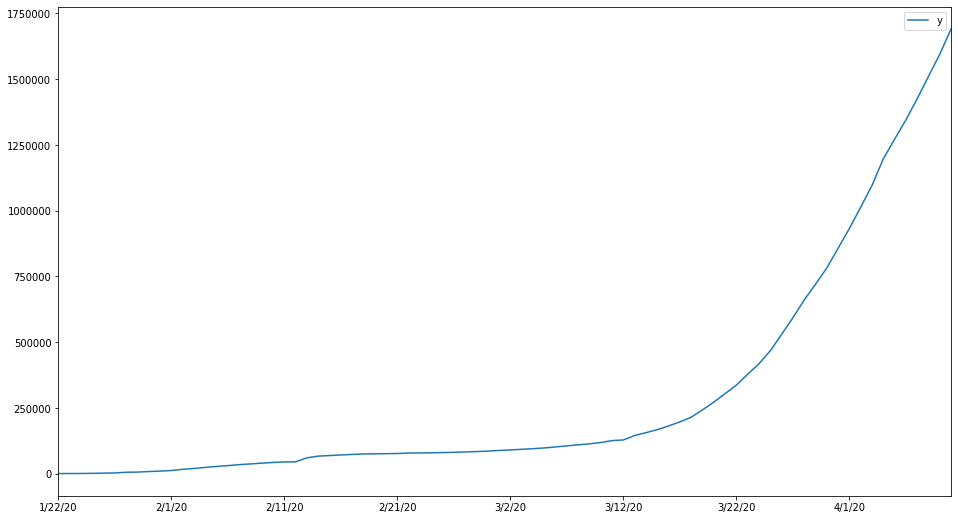

In [8]:
serie_geral.plot(figsize=(16,9))
plt.show()

In [9]:
serie_geral.index = pd.to_datetime(serie_geral.index)

In [10]:
serie_geral.columns

Index(['y'], dtype='object')

In [11]:
serie_geral

,y
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927
2020-01-28,5578
2020-01-29,6166
2020-01-30,8234
2020-01-31,9927


In [12]:
#"0" = Segunda-Feira
serie_geral.rename(columns={0:'y'},inplace=True)
serie_geral['dia'] = serie_geral.index.day
serie_geral['dia_semana']= serie_geral.index.dayofweek
serie_geral['mes']= serie_geral.index.month
serie_geral

,y,dia,dia_semana,mes
2020-01-22,555,22,2,1
2020-01-23,654,23,3,1
2020-01-24,941,24,4,1
2020-01-25,1434,25,5,1
2020-01-26,2118,26,6,1
2020-01-27,2927,27,0,1
2020-01-28,5578,28,1,1
2020-01-29,6166,29,2,1
2020-01-30,8234,30,3,1
2020-01-31,9927,31,4,1


In [13]:
serie_geral.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2020-01-22 to 2020-04-10
Data columns (total 4 columns):
y             80 non-null int64
dia           80 non-null int64
dia_semana    80 non-null int64
mes           80 non-null int64
dtypes: int64(4)
memory usage: 3.1 KB


In [14]:
len(serie_geral)

80

# BASELINE - LINEAR REGRESSION
- R2_train: 0.62
- MAPE_train: 916.47%
- R2_test: -22.53
- MAPE_test: 64.79%

X_train: (72, 3)
X_test: (8, 3)

R2_train: 0.62
MAPE_train: 916.47%

R2_test: -22.53
MAPE_test: 64.79%



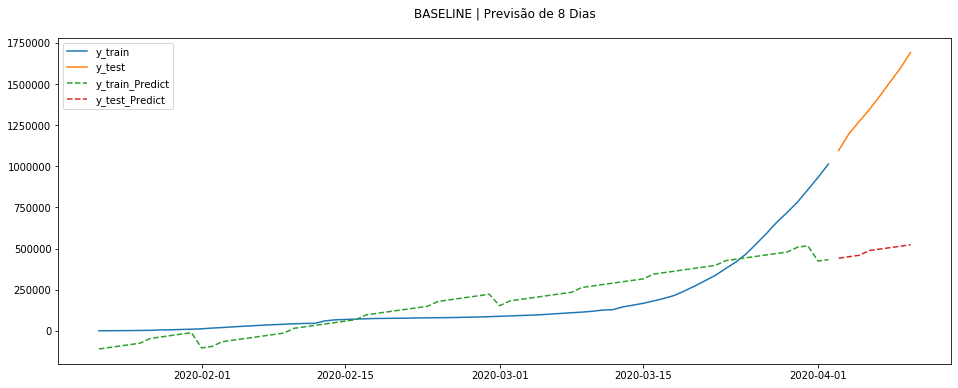

In [15]:
tx_treino=0.9
X_train = serie_geral.iloc[:round(len(serie_geral) * tx_treino),1:]
X_test = serie_geral.iloc[round(len(serie_geral) * tx_treino):,1:]

y_train = serie_geral.iloc[:round(len(serie_geral) * tx_treino),0]
y_test = serie_geral.iloc[round(len(serie_geral) * tx_treino):,0]
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}\n')

from sklearn.linear_model import LinearRegression
mdl_lr=LinearRegression().fit(X_train,y_train)
y_pred_train = mdl_lr.predict(X_train)

y_pred_test = mdl_lr.predict(X_test)

df_previsao_train = {'y_pred_train':y_pred_train}
df_previsao_train = pd.DataFrame(df_previsao_train)
df_previsao_train.index = X_train.index

df_previsao_test = {'y_pred_test':y_pred_test}
df_previsao_test = pd.DataFrame(df_previsao_test)
df_previsao_test.index = X_test.index

r2_train = r2_score(y_train,y_pred_train).round(2)
mape_train = mape(y_train,y_pred_train).round(2)
r2_test = r2_score(y_test,y_pred_test).round(2)
mape_test = mape(y_test,y_pred_test).round(2)



print("R2_train: {}".format(r2_train))
print("MAPE_train: {}%\n".format(mape_train))
print("R2_test: {}".format(r2_test))
print("MAPE_test: {}%\n".format(mape_test))

plt.figure(figsize=(16,6))
plt.title(f'BASELINE | Previsão de {len(y_test)} Dias\n')
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(df_previsao_train, linestyle='dashed',label = 'y_train_Predict')
plt.plot(df_previsao_test, linestyle='dashed',label = 'y_test_Predict')
plt.legend(loc = 'upper left')
plt.show()

# FEATURE ENGINEERING 1: DUMMIE E LAG

## DUMMIZAÇÃO

In [16]:
serie_geral_dummie = pd.get_dummies(serie_geral,columns={'dia', 'dia_semana', 'mes'},drop_first=True)
serie_geral_dummie.shape

(80, 40)

## LAG 4

In [17]:
serie_geral_dummie['lag4'] = serie_geral_dummie['y'].shift(4)

print(serie_geral_dummie.shape)
serie_geral_dummie.head()

(80, 41)


,y,mes_2,mes_3,mes_4,dia_2,dia_3,dia_4,dia_5,dia_6,dia_7,dia_8,dia_9,dia_10,dia_11,dia_12,dia_13,dia_14,dia_15,dia_16,dia_17,dia_18,dia_19,dia_20,dia_21,dia_22,dia_23,dia_24,dia_25,dia_26,dia_27,dia_28,dia_29,dia_30,dia_31,dia_semana_1,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,dia_semana_6,lag4
2020-01-22,555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN
2020-01-23,654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
2020-01-24,941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
2020-01-25,1434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NaN
2020-01-26,2118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,555.0


# MODELO 1: LINEAR REGRESSION COM DUMMIES E LAG
- R2_train: 1.0
- MAPE_train: 37.82%
- R2_test: -1.1
- MAPE_test: 15.76%

X_train: (68, 40)
X_test: (8, 40)

R2_train: 1.0
MAPE_train: 37.82%

R2_test: -1.1
MAPE_test: 15.76%



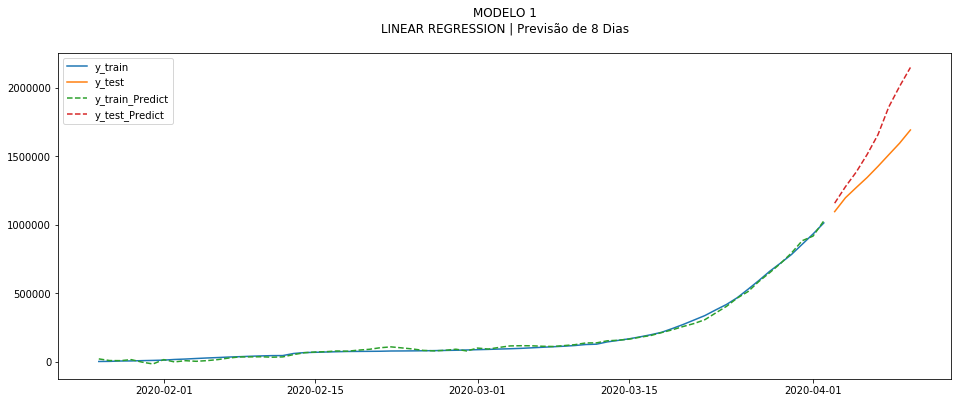

In [18]:
#Eliminando as 5 primeiras entradas do dataset que possuem valor NANs devido a criação das features Lag5 e Lag4
serie_geral_dummie.dropna(inplace=True)
serie_geral_dummie.shape

tx_treino=0.9
X_train = serie_geral_dummie.iloc[:round(len(serie_geral_dummie) * tx_treino),1:]
X_test = serie_geral_dummie.iloc[round(len(serie_geral_dummie) * tx_treino):,1:]

y_train = serie_geral_dummie.iloc[:round(len(serie_geral_dummie) * tx_treino),0]
y_test = serie_geral_dummie.iloc[round(len(serie_geral_dummie) * tx_treino):,0]
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}\n')

from sklearn.linear_model import LinearRegression
mdl_lr=LinearRegression().fit(X_train,y_train)
y_pred_train = mdl_lr.predict(X_train)

y_pred_test = mdl_lr.predict(X_test)

df_previsao_train = {'y_pred_train':y_pred_train}
df_previsao_train = pd.DataFrame(df_previsao_train)
df_previsao_train.index = X_train.index

df_previsao_test = {'y_pred_test':y_pred_test}
df_previsao_test = pd.DataFrame(df_previsao_test)
df_previsao_test.index = X_test.index

r2_train = r2_score(y_train,y_pred_train).round(2)
mape_train = mape(y_train,y_pred_train).round(2)
r2_test = r2_score(y_test,y_pred_test).round(2)
mape_test = mape(y_test,y_pred_test).round(2)


print("R2_train: {}".format(r2_train))
print("MAPE_train: {}%\n".format(mape_train))
print("R2_test: {}".format(r2_test))
print("MAPE_test: {}%\n".format(mape_test))

plt.figure(figsize=(16,6))
plt.title(f'MODELO 1\nLINEAR REGRESSION | Previsão de {len(y_test)} Dias\n')
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(df_previsao_train, linestyle='dashed',label = 'y_train_Predict')
plt.plot(df_previsao_test, linestyle='dashed',label = 'y_test_Predict')
plt.legend(loc = 'upper left')
plt.show()

# MODELO 1A - LINEAR REGRESSION - SEM DUMMIES - APENAS LAGS
- R2_train: 0.99
- MAPE_train: 28.8%
- R2_test: -0.17
- MAPE_test: 12.37%

- SEM DUMMIES E APENAS COM LAG A PERFORMANCE FOI MELHOR

In [19]:
serie_geral['lag4'] = serie_geral['y'].shift(4)
#serie_geral['lag5'] = serie_geral['y'].shift(5)

print(serie_geral.shape)
serie_geral.head()

(80, 5)


,y,dia,dia_semana,mes,lag4
2020-01-22,555,22,2,1,NaN
2020-01-23,654,23,3,1,NaN
2020-01-24,941,24,4,1,NaN
2020-01-25,1434,25,5,1,NaN
2020-01-26,2118,26,6,1,555.0


X_train: (68, 4)
X_test: (8, 4)

R2_train: 0.99
MAPE_train: 28.8%

R2_test: -0.17
MAPE_test: 12.37%



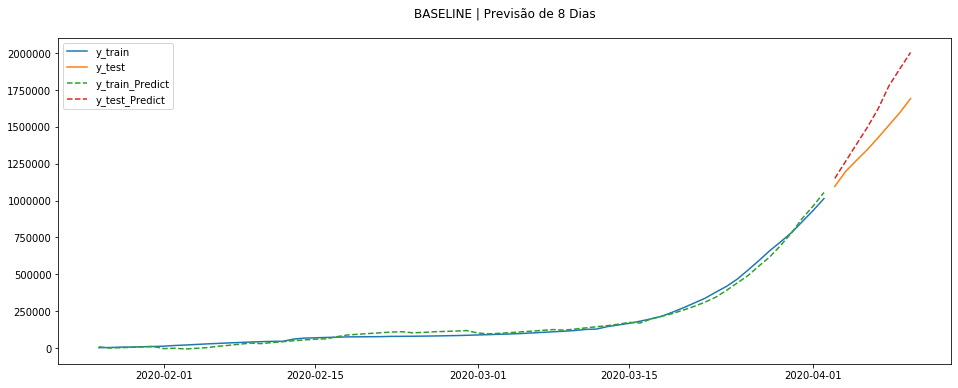

In [20]:
#Eliminando as 4 primeiras entradas do dataset que possuem valor NANs devido a criação das feature Lag4
serie_geral.dropna(inplace=True)
serie_geral.shape

tx_treino=0.9
X_train = serie_geral.iloc[:round(len(serie_geral) * tx_treino),1:]
X_test = serie_geral.iloc[round(len(serie_geral) * tx_treino):,1:]

y_train = serie_geral.iloc[:round(len(serie_geral) * tx_treino),0]
y_test = serie_geral.iloc[round(len(serie_geral) * tx_treino):,0]
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}\n')

from sklearn.linear_model import LinearRegression
mdl_lr=LinearRegression().fit(X_train,y_train)
y_pred_train = mdl_lr.predict(X_train)

y_pred_test = mdl_lr.predict(X_test)

df_previsao_train = {'y_pred_train':y_pred_train}
df_previsao_train = pd.DataFrame(df_previsao_train)
df_previsao_train.index = X_train.index

df_previsao_test = {'y_pred_test':y_pred_test}
df_previsao_test = pd.DataFrame(df_previsao_test)
df_previsao_test.index = X_test.index

r2_train = r2_score(y_train,y_pred_train).round(2)
mape_train = mape(y_train,y_pred_train).round(2)
r2_test = r2_score(y_test,y_pred_test).round(2)
mape_test = mape(y_test,y_pred_test).round(2)


print("R2_train: {}".format(r2_train))
print("MAPE_train: {}%\n".format(mape_train))
print("R2_test: {}".format(r2_test))
print("MAPE_test: {}%\n".format(mape_test))


plt.figure(figsize=(16,6))
plt.title(f'BASELINE | Previsão de {len(y_test)} Dias\n')
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(df_previsao_train, linestyle='dashed',label = 'y_train_Predict')
plt.plot(df_previsao_test, linestyle='dashed',label = 'y_test_Predict')
plt.legend(loc = 'upper left')
plt.show()

# MODELO 2A - LINEAR REGRESSION - FORECAST T+4 EM DATASETS SEPARADOS
- R2_train: 0.99
- MAPE_train: 43.41%
- TREINANDO O MODELO COM 100% DO DATASET E PREVENDO T+4 DESCONHECIDO

In [21]:
cols = X_test.columns

data = [[11,5,4,serie_geral.lag4[-4]],
        [12,6,4,serie_geral.lag4[-3]],
        [13,0,4,serie_geral.lag4[-2]],
        [14,1,4,serie_geral.lag4[-1]]]

t4 = pd.DataFrame(data, columns=cols)
t4.index = ['2020-04-11', '2020-04-12','2020-04-13','2020-04-14']
t4.index = pd.to_datetime(t4.index)
t4

,dia,dia_semana,mes,lag4
2020-04-11,11,5,4,1095917.0
2020-04-12,12,6,4,1197408.0
2020-04-13,13,0,4,1272115.0
2020-04-14,14,1,4,1345101.0


X_train: (76, 4)
y_train: (76,)
X_forecast: (4, 4)

R2_train: 0.99
MAPE_train: 43.41%



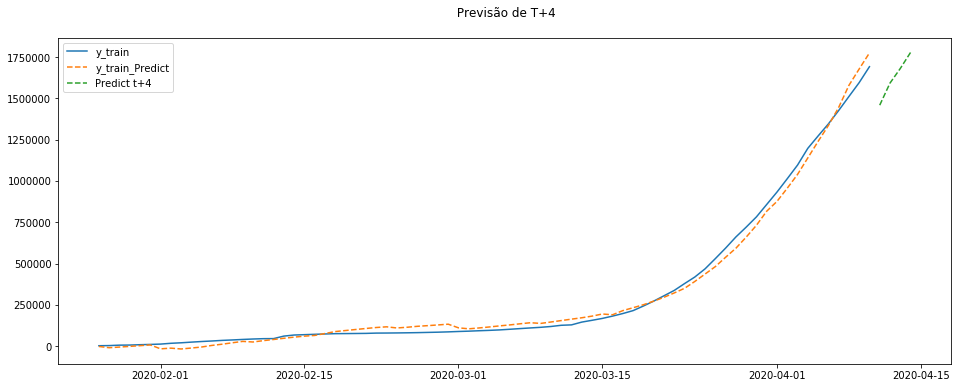

In [26]:
X_train = serie_geral.iloc[:,1:]
y_train = serie_geral.iloc[:,0]
X_forecast = t4
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_forecast: {X_forecast.shape}\n')

from sklearn.linear_model import LinearRegression
mdl_lr=LinearRegression().fit(X_train,y_train)
y_pred_train = mdl_lr.predict(X_train).round(2)

y_forecast = mdl_lr.predict(X_forecast)

pred_train = {'y_pred_train':y_pred_train}
pred_train = pd.DataFrame(pred_train)
pred_train.index = X_train.index

pred_forecast = {'y_forecast':y_forecast}
pred_forecast = pd.DataFrame(pred_forecast)
pred_forecast.index = t4.index
pred_forecast['y_forecast'] = y_forecast

r2_train = r2_score(y_train,y_pred_train).round(2)
mape_train = mape(y_train,y_pred_train).round(2)

print("R2_train: {}".format(r2_train))
print("MAPE_train: {}%\n".format(mape_train))

plt.figure(figsize=(16,6))
plt.title(f' Previsão de T+4\n')
plt.plot(y_train, label = 'y_train')
plt.plot(pred_train, linestyle='dashed',label = 'y_train_Predict')
plt.plot(pred_forecast, linestyle='dashed',label = 'Predict t+4')
plt.legend(loc = 'upper left')
plt.show()

In [27]:
corr = serie_geral.corr()
corr['y']

y             1.000000
dia          -0.164368
dia_semana   -0.010067
mes           0.775650
lag4          0.996239
Name: y, dtype: float64